# 데이터마이닝 Homework 1

### 학번 : 22512091 , 이름 : 허준봉

과제 수행이 어려운 사람들을 위해, report 작성에 도움이 될 문제들을 step-by-step으로 구현합니다.  
(문제의 답안들은 예시일 뿐이며 정확하지 않을 수 있습니다.)


In [1]:
# 이 셀을 실행한 후에 문제들을 풀어주세요.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## 0. 데이터 전처리 및 분석

### (1) Dataset을 불러오시오.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Datamining_class/anthropometry.csv')
data.head(5)

,Gender,Weight,Height
0,Male,64.98,158.33
1,Male,88.03,184.79
2,Male,79.28,176.78
3,Male,73.95,166.68
4,Male,56.24,162.76


### (2) 각 변수에 결측치가 몇 개 있는지 체크하시오.

In [4]:
data.isnull().sum()

Gender    0
Weight    0
Height    0
dtype: int64

### (3) `Weight`와 `Height`의 산점도를 그리시오.

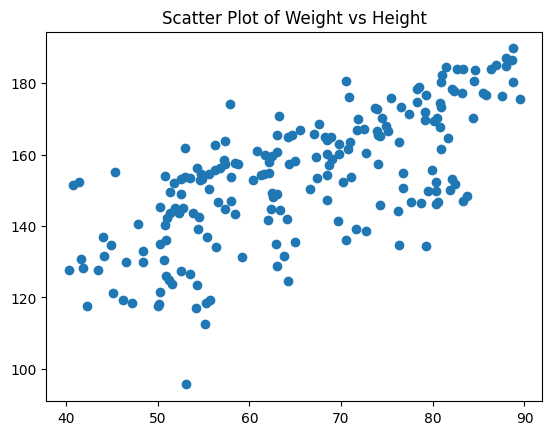

In [5]:
plt.scatter(data['Weight'],data['Height'])
plt.title('Scatter Plot of Weight vs Height')
plt.show()

### (4) `Weight`와 `Height` 사이의 상관계수를 구하시오.

In [6]:
data2=data.drop(['Gender'],axis=1)
data2

,Weight,Height
0,64.98,158.33
1,88.03,184.79
2,79.28,176.78
3,73.95,166.68
4,56.24,162.76
...,...,...
195,55.71,119.32
196,72.67,138.61
197,80.37,149.68
198,79.92,155.68


In [7]:
data2.corr()

,Weight,Height
Weight,1.000000,0.701018
Height,0.701018,1.000000


### (5) `Gender`에 따른 `Weight`와 `Height`의 산점도를 그리시오.

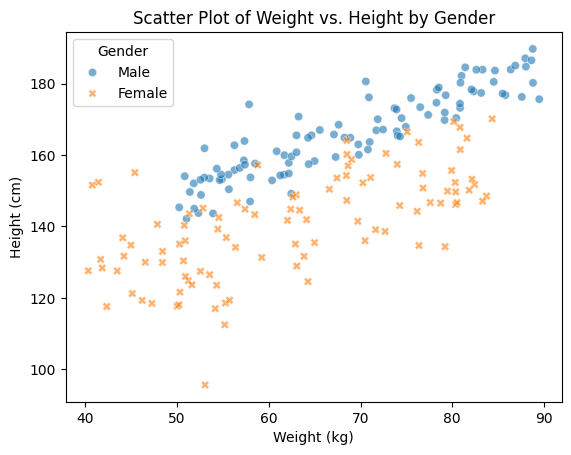

In [8]:
# Seaborn을 사용한 산점도

import seaborn as sns
import pandas as pd
import numpy as np

sns.scatterplot(data=data, x='Weight', y='Height', hue='Gender', style='Gender', alpha=0.6)
plt.title('Scatter Plot of Weight vs. Height by Gender')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

### (6) `Gender`를 구분 한 후, `Weight`와 `Height`의 상관관계를 구하시오.

In [9]:
# 성별로 데이터 분리
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# 각 그룹에서 Weight와 Height의 상관계수 계산
male_correlation = male_df['Weight'].corr(male_df['Height'])
female_correlation = female_df['Weight'].corr(female_df['Height'])

print(f"Male Weight and Height Correlation: {male_correlation:.2f}")
print(f"Female Weight and Height Correlation: {female_correlation:.2f}")

Male Weight and Height Correlation: 0.91
Female Weight and Height Correlation: 0.64


### (7) 변수 `Gender`의 값을 다음처럼 숫자로 변환하시오
+ `Female`-> 0
+ `Male` -> 1

In [10]:
# Gender 값을 숫자로 변환

data['Gender'] = data['Gender'].replace({'Female': 0, 'Male': 1})

In [11]:
data

,Gender,Weight,Height
0,1,64.98,158.33
1,1,88.03,184.79
2,1,79.28,176.78
3,1,73.95,166.68
4,1,56.24,162.76
...,...,...,...
195,0,55.71,119.32
196,0,72.67,138.61
197,0,80.37,149.68
198,0,79.92,155.68


### (8) dataset의 다음 변수들을 X와 y에 저장하고, X를 출력하시오.

X <- `Gender`, `Weight`  
y <- `Height`

In [12]:
# X와 y 변수에 데이터 저장
X = data[['Gender', 'Weight']]
y = data['Height']

# X 출력
print(X.head())

   Gender  Weight
0       1   64.98
1       1   88.03
2       1   79.28
3       1   73.95
4       1   56.24


### (9) Dataset으로부터 training set과 test set을 7:3 비율로 분리하시오. (이 때, 일관성을 위해서 random_state=123 옵션을 넣어주세요)
+ Training set: X_train, y_train
+ Test set: X_test, y_test
+ Option: random_state=123

In [13]:
from sklearn.model_selection import train_test_split

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 분리된 데이터셋 크기 확인
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (140, 2)
X_test shape: (60, 2)
y_train shape: (140,)
y_test shape: (60,)


## 1. Linear regression
### (1) Traning set의 X와 y 관계를 가장 잘 설명하는 선형회귀식의 회귀계수들을 구하시오.

In [14]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 훈련
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 회귀계수와 절편 출력
print(f"Coefficients: {lr_model.coef_}")            # Gender의 회귀계수와 Weight의 회귀계수가 각각 출력됨
print(f"Intercept: {lr_model.intercept_}")

Coefficients: [19.91402398  0.82198931]
Intercept: 89.759233798015


### (2) 각 변수의 회귀계수 유의성을 나타내는 t-statistic과 p-value를 구하시오.

In [15]:
import statsmodels.api as sm

# 상수항 추가
X_train_with_const = sm.add_constant(X_train)

# OLS 모델 적합
model = sm.OLS(y_train, X_train_with_const).fit()

# 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     307.5
Date:                Wed, 10 Apr 2024   Prob (F-statistic):           2.22e-51
Time:                        13:12:18   Log-Likelihood:                -484.59
No. Observations:                 140   AIC:                             975.2
Df Residuals:                     137   BIC:                             984.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.7592      3.565     25.178      0.0

### (3) 추정한 회귀식을 바탕으로 test set에 대한 R-squared와 RMSE를 구하시오.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 세트에 대한 예측 수행
y_pred_test = lr_model.predict(X_test)

# R-squared 값 계산
r_squared_test = r2_score(y_test, y_pred_test)

# RMSE 계산
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"R-squared for the test set: {r_squared_test:.5f}")
print(f"RMSE for the test set: {rmse_test:.5f}")

R-squared for the test set: 0.65777
RMSE for the test set: 10.68500


### (4) `Height` 예측 값 vs 실제 값 plot
+ 그어진 직선은 예측 값과 실제 값이 똑같음을 의미합니다.
+ 예측 값과 실제 값을 plot하는 것이 아닌 잔차(실제 값-예측 값)에 대한 plot을 그려도 됩니다.

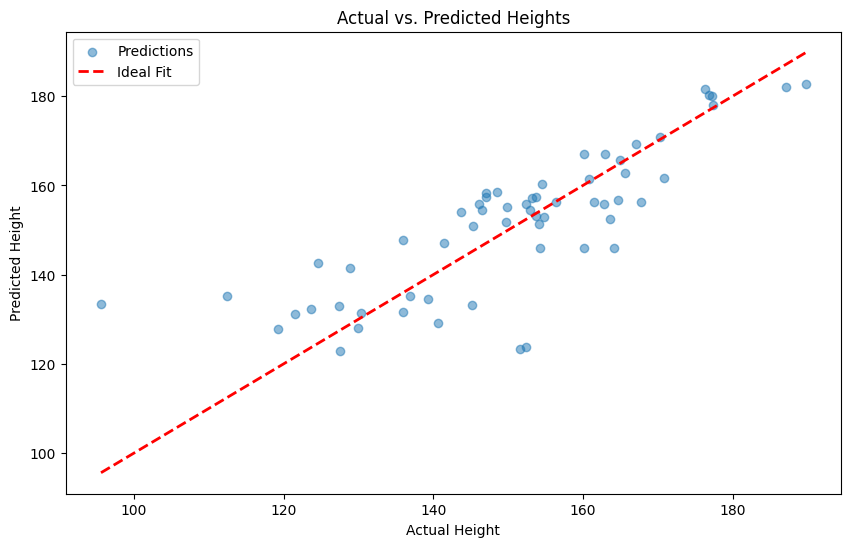

In [17]:
import matplotlib.pyplot as plt

# 예측 값 vs 실제 값 산점도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual vs. Predicted Heights')
plt.legend()
plt.show()

## 2. Regression tree

### (1) 다음 pre-pruning 조건으로 training set을 학습한 회귀나무를 그리시오.
+ Pre-pruning: 리프 노드의 샘플 수가 20개 이하가 되면 노드를 분할하지 않고 종료

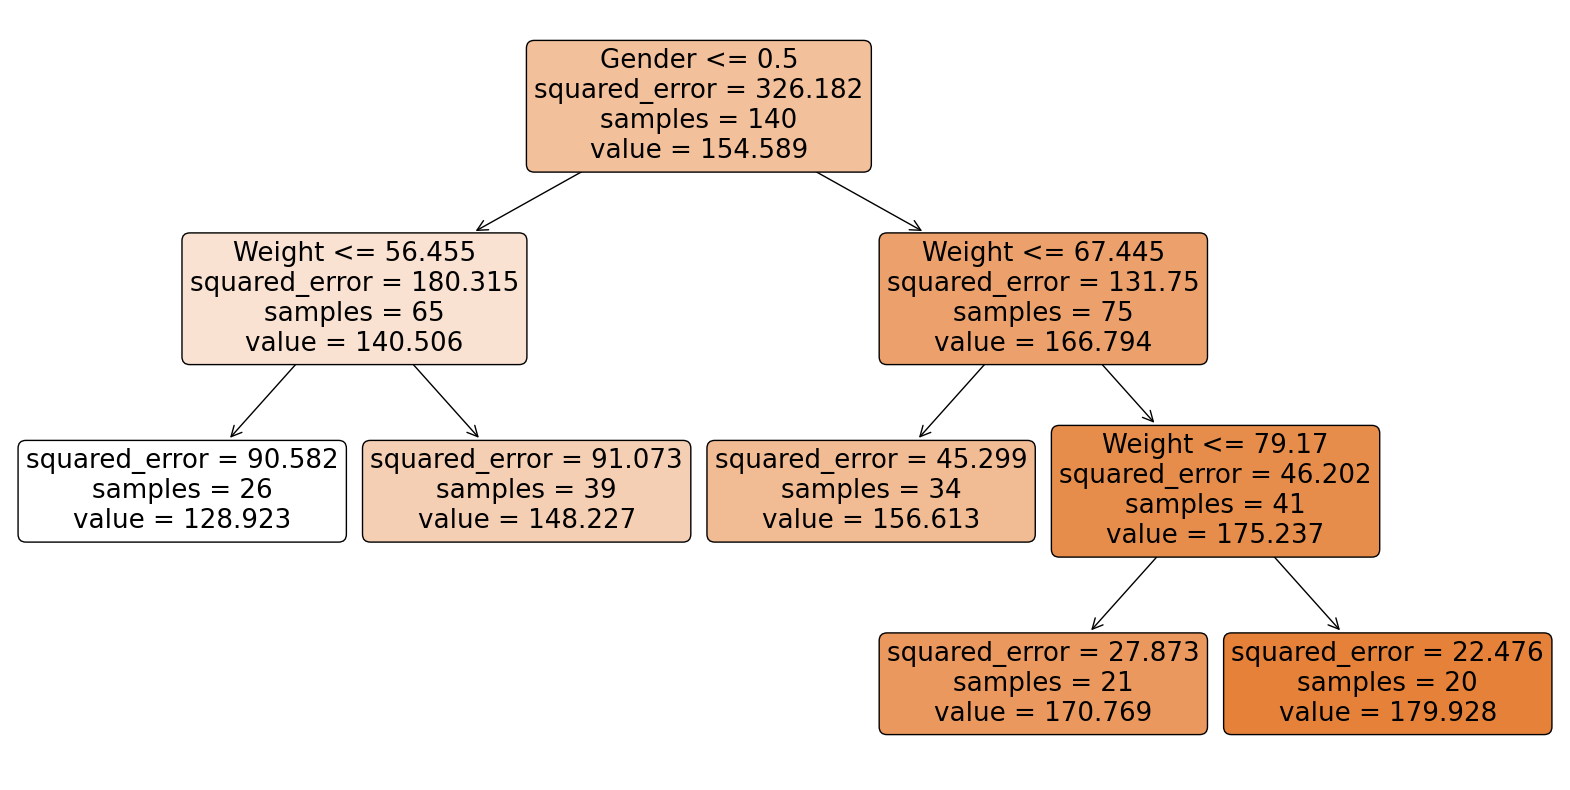

In [18]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# 회귀나무 모델 생성 (min_samples_leaf=20으로 pre-pruning 적용)
reg_tree = DecisionTreeRegressor(min_samples_leaf=20)

# 모델을 훈련 세트에 적합시키기
reg_tree.fit(X_train, y_train)

# 회귀나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

### (2) 추정한 회귀나무를 바탕으로 test set에 대한 RMSE를 구하시오.

In [19]:
from sklearn.metrics import mean_squared_error

# 테스트 세트에 대한 예측을 수행
y_pred_test_tree = reg_tree.predict(X_test)

# RMSE 계산
rmse_test_tree = mean_squared_error(y_test, y_pred_test_tree, squared=False)

print(f"Test set RMSE: {rmse_test_tree:.5f}")

Test set RMSE: 10.95076


## 3. Visualizable tree

### (1) 다음 pre-pruning 조건으로 training set을 학습한 회귀나무를 그리시오.
+ max_depth = 1

[Text(0.5, 0.75, 'Gender <= 0.5\nsquared_error = 326.182\nsamples = 140\nvalue = 154.589'),
 Text(0.25, 0.25, 'squared_error = 180.315\nsamples = 65\nvalue = 140.506'),
 Text(0.75, 0.25, 'squared_error = 131.75\nsamples = 75\nvalue = 166.794')]

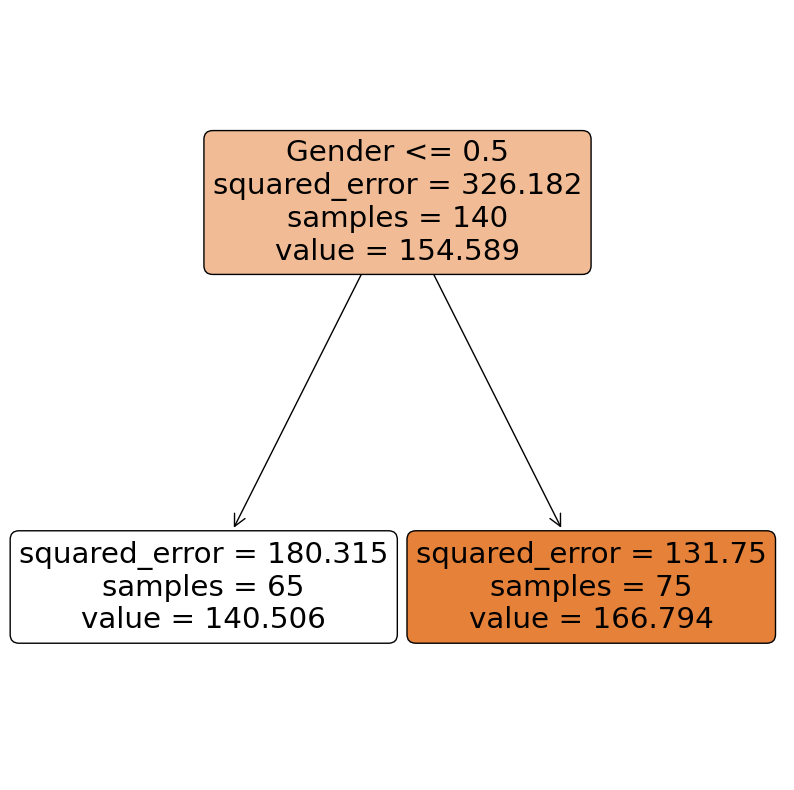

In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# 회귀나무 모델 생성 (max_depth=1으로 pre-pruning 적용)
reg_tree = DecisionTreeRegressor(max_depth=1)

# 모델을 훈련 세트에 적합시키기
reg_tree.fit(X_train, y_train)

# 회귀나무 시각화
plt.figure(figsize=(10, 10))
plot_tree(reg_tree, filled=True, feature_names=X_train.columns, rounded=True)

### (2) 문제 3-(1)에서 구한 회귀나무에서 왼쪽 리프노드와 오른쪽 리프노드에 해당하는 dataset을 구하고, 구한 dataset에서 `Height` 평균을 출력하시오. 3-(1)의 회귀나무 리프노드 결과와 똑같은가?
+ left_leaf_subset
    + left_leaf_X_train
    + left_leaf_y_train
+ right_leaf_subset
    + right_leaf_X_train
    + right_leaf_y_train
+ (전체 dataset이 아니라, training set임을 주의하세요.)

In [21]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# 회귀나무 모델을 사용하여 각 훈련 샘플이 속한 리프 노드 인덱스를 얻기
leaf_node_indices = reg_tree.apply(X_train)

# 가장 왼쪽과 오른쪽 리프 노드의 인덱스를 찾기
left_leaf_index = np.min(leaf_node_indices)
right_leaf_index = np.max(leaf_node_indices)

# 왼쪽 리프 노드에 해당하는 데이터셋
left_leaf_X_train = X_train[leaf_node_indices == left_leaf_index]
left_leaf_y_train = y_train[leaf_node_indices == left_leaf_index]

# 오른쪽 리프 노드에 해당하는 데이터셋
right_leaf_X_train = X_train[leaf_node_indices == right_leaf_index]
right_leaf_y_train = y_train[leaf_node_indices == right_leaf_index]

# 각 리프 노드에서의 Height 평균 계산
left_leaf_height_mean = left_leaf_y_train.mean()
right_leaf_height_mean = right_leaf_y_train.mean()

print("왼쪽 리프 노드의 Height 평균:", left_leaf_height_mean)
print("오른쪽 리프 노드의 Height 평균:", right_leaf_height_mean)

왼쪽 리프 노드의 Height 평균: 140.50569230769233
오른쪽 리프 노드의 Height 평균: 166.79373333333334


### (3) 두 리프 노드에 속하는 dataset 에서, 변수 `Weight`와 `Height` 관계를 잘 설명하는 선형회귀계수를 추정하시요.

In [22]:
from sklearn.linear_model import LinearRegression

# 왼쪽 리프 노드 데이터셋에 대한 선형 회귀 모델 생성 및 적합
lr_model_left = LinearRegression()
lr_model_left.fit(left_leaf_X_train[['Weight']], left_leaf_y_train)

# 오른쪽 리프 노드 데이터셋에 대한 선형 회귀 모델 생성 및 적합
lr_model_right = LinearRegression()
lr_model_right.fit(right_leaf_X_train[['Weight']], right_leaf_y_train)

# 왼쪽 리프 노드의 선형 회귀 계수 및 절편
left_leaf_coeff = lr_model_left.coef_[0]
left_leaf_intercept = lr_model_left.intercept_

# 오른쪽 리프 노드의 선형 회귀 계수 및 절편
right_leaf_coeff = lr_model_right.coef_[0]
right_leaf_intercept = lr_model_right.intercept_

print("왼쪽 리프 노드 선형 회귀 계수 및 절편:", left_leaf_coeff, left_leaf_intercept)
print("오른쪽 리프 노드 선형 회귀 계수 및 절편:", right_leaf_coeff, right_leaf_intercept)


왼쪽 리프 노드 선형 회귀 계수 및 절편: 0.7381624087037346 94.93438428051107
오른쪽 리프 노드 선형 회귀 계수 및 절편: 0.9075239687629273 103.72940873121418


### (4) 두 리프노드에서의 회귀 직선과 함께, `Gender`에 따른 `Weight`, `Height`의 산점도를 그리시오.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-23-e93131af9602>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_range_left, y_pred_left, 'r-', color='red', label='Female_Regression Line')
<ipython-input-23-e93131af9602>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_range_right, y_pred_right, 'r-', color='blue', label='Male_Regression Line')


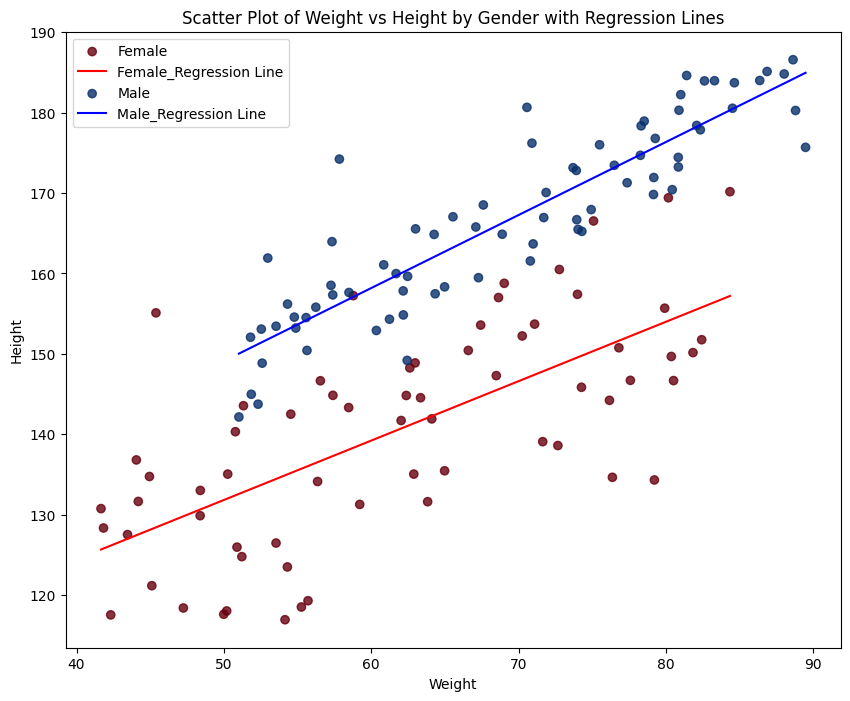

In [23]:
# 산점도 및 선형 회귀 직선 그리기

plt.figure(figsize=(10, 8))
# 왼쪽 리프 노드 데이터셋에 대한 선형 회귀 직선 생성
x_range_left = np.linspace(left_leaf_X_train['Weight'].min(), left_leaf_X_train['Weight'].max(), 100).reshape(-1, 1)
y_pred_left = lr_model_left.predict(x_range_left)

# 오른쪽 리프 노드 데이터셋에 대한 선형 회귀 직선 생성
x_range_right = np.linspace(right_leaf_X_train['Weight'].min(), right_leaf_X_train['Weight'].max(), 100).reshape(-1, 1)
y_pred_right = lr_model_right.predict(x_range_right)
plt.scatter(left_leaf_X_train['Weight'], left_leaf_y_train, c=left_leaf_X_train['Gender'], alpha=0.8, cmap='Reds_r',label='Female')
plt.plot(x_range_left, y_pred_left, 'r-', color='red', label='Female_Regression Line')
plt.scatter(right_leaf_X_train['Weight'], right_leaf_y_train, c=right_leaf_X_train['Gender'],alpha=0.8, cmap='Blues_r',label='Male')
plt.plot(x_range_right, y_pred_right, 'r-', color='blue', label='Male_Regression Line')
plt.title('Scatter Plot of Weight vs Height by Gender with Regression Lines')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()


### (5) Test set에 대한 RMSE를 구하시오.

+ 두 리프노드의 예측 오차를 계산하여, RMSE를 구합니다.

In [24]:
from sklearn.metrics import mean_squared_error

# 테스트 세트에서 각 샘플이 속한 리프 노드 인덱스 구하기
test_leaf_nodes = reg_tree.apply(X_test)

# 가장 왼쪽과 오른쪽 리프 노드의 인덱스를 찾기
left_leaf_index = np.min(test_leaf_nodes)
right_leaf_index = np.max(test_leaf_nodes)

# 왼쪽 리프 노드에 해당하는 테스트 샘플 분류
left_leaf_X_test = X_test[test_leaf_nodes == left_leaf_index]
left_leaf_y_test = y_test[test_leaf_nodes == left_leaf_index]

# 오른쪽 리프 노드에 해당하는 테스트 샘플 분류

right_leaf_X_test = X_test[test_leaf_nodes == right_leaf_index]
right_leaf_y_test = y_test[test_leaf_nodes == right_leaf_index]

# 왼쪽 리프 노드 데이터셋에 대한 예측 수행
y_pred_left = lr_model_left.predict(pd.DataFrame(left_leaf_X_test[['Weight']]))

# 오른쪽 리프 노드 데이터셋에 대한 예측 수행
y_pred_right = lr_model_right.predict(pd.DataFrame(right_leaf_X_test[['Weight']]))

# 전체 예측값을 하나의 배열로 결합
y_pred_full = np.concatenate([y_pred_left, y_pred_right])

# 실제 값도 같은 순서로 결합
y_true_full = np.concatenate([left_leaf_y_test, right_leaf_y_test])

# RMSE 계산
rmse = mean_squared_error(y_true_full, y_pred_full, squared=False)
print("Test Set RMSE:", rmse)



Test Set RMSE: 10.56225579812439


## 4. Hybrid decision tree and regression

### (1) 문제 3-(1)에서 구한 회귀나무에서 두 리프노드의 잔차를 계산한다.
+ Regression tree의 모델에 내장되어있는 predict를 사용하면 쉽습니다.

In [25]:
y_train[leaf_node_indices == left_leaf_index].mean()

140.50569230769233

In [26]:
y_train[leaf_node_indices == right_leaf_index].mean()

166.79373333333334

In [27]:
# 왼쪽 리프 노드에 속하는 샘플들의 잔차 계산
left_leaf_residuals = y_train[leaf_node_indices == left_leaf_index] - y_train[leaf_node_indices == left_leaf_index].mean()

# 오른쪽 리프 노드에 속하는 샘플들의 잔차 계산
right_leaf_residuals = y_train[leaf_node_indices == right_leaf_index] - y_train[leaf_node_indices == right_leaf_index].mean()


In [28]:
# 전체 예측값을 하나의 배열로 결합

residuals_train = np.concatenate([left_leaf_residuals , right_leaf_residuals ])



### (2) 두 리프노드의 잔차를 바탕으로 회귀계수를 추정하시오.

In [29]:
new_train_X=pd.concat([left_leaf_X_train,right_leaf_X_train],axis=0)
new_train_X

,Gender,Weight
107,0,74.00
112,0,81.84
145,0,41.66
151,0,50.78
154,0,84.35
...,...,...
57,1,57.84
83,1,52.54
17,1,70.99
98,1,51.02


In [30]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 적합

lr_model2 = LinearRegression()
lr_model2.fit(pd.DataFrame(new_train_X),pd.DataFrame(residuals_train))


LinearRegression()

In [31]:
# 잔차 회귀식

coef = lr_model2.coef_[0]
intercept = lr_model2.intercept_
print(coef)
print(intercept)

[-6.37401705  0.82198931]
[-50.74645851]


### (3) Test set에 대한 `Height`를 예측하세요.
+ regression tree의 예측 값과 (2)에서 추정한 회귀선의 예측 값을 더하면 됩니다.
+ $\hat y=\hat y_{tree}+ \hat y_{reg}$

In [32]:
residual_test_pred=lr_model2.predict(X_test)
residual_test_pred

array([[ 15.8557354 ],
       [ 13.96875988],
       [-12.80703185],
       [ -7.55914016],
       [ -6.44483459],
       [ 15.70315732],
       [-12.77877228],
       [ 13.39798736],
       [  5.56802913],
       [ -9.07982038],
       [ -5.13787158],
       [  6.54619641],
       [ 16.33608909],
       [ -8.92364241],
       [ -9.40039621],
       [-10.41504295],
       [-10.89179675],
       [ 16.77996332],
       [ 15.27572288],
       [  4.09306837],
       [  1.0717476 ],
       [ 13.15139057],
       [ -5.99736047],
       [  7.19556796],
       [-17.61206942],
       [-15.8401724 ],
       [ -5.24935019],
       [ -9.45331546],
       [ -7.32898315],
       [ 14.86934823],
       [-12.21519954],
       [  2.43264996],
       [ 14.58525186],
       [  2.08279445],
       [ -5.32692912],
       [ -5.38086848],
       [ -8.32359021],
       [ 18.07870643],
       [  0.21327883],
       [ 17.73347092],
       [ -1.02792503],
       [ 15.727817  ],
       [  5.55980923],
       [ 15

In [33]:
test_pred=pd.DataFrame()
# 테스트 세트에 대한 예측을 수행
test_pred['test_pred_reg_tree']= reg_tree.predict(X_test)
test_pred['test_residual']=lr_model2.predict(X_test)
test_pred['hybrid_test_pred']=test_pred['test_pred_reg_tree']+test_pred['test_residual']

In [34]:
len(test_pred)

60

### (4) Test set에 대한 RMSE 값을 출력하시오.

In [35]:
# RMSE 계산
rmse_test_tree = mean_squared_error(np.array(y_test), test_pred['hybrid_test_pred'], squared=False)

print(f"Test set RMSE: {rmse_test_tree:.5f}")

Test set RMSE: 10.68500


### (5) Test dataset의 예측 값과 함께, `Gender`에 따른 `Weight`과 `Height` 값을 산점도로 나타내시오.

In [36]:
test_data=pd.concat([X_test,y_test],axis=1)
test_data=test_data.reset_index()
test_data=pd.concat([test_data,test_pred],axis=1)
test_data

,index,Gender,Weight,Height,test_pred_reg_tree,test_residual,hybrid_test_pred
0,50,1,88.78,189.76,166.793733,15.855735,182.649469
1,127,0,78.73,146.55,140.505692,13.968760,154.474452
2,37,1,53.91,143.64,166.793733,-12.807032,153.986701
3,149,0,52.54,127.43,140.505692,-7.559140,132.946552
4,19,1,61.65,154.49,166.793733,-6.444835,160.348899
5,104,0,80.84,167.75,140.505692,15.703157,156.208850
6,179,0,46.19,119.26,140.505692,-12.778772,127.726920
7,53,1,85.79,176.81,166.793733,13.397987,180.191721
8,162,0,68.51,160.20,140.505692,5.568029,146.073721
9,158,0,50.69,130.34,140.505692,-9.079820,131.425872


In [37]:
test_data['Gender']=np.where(test_data['Gender']==0,'Female','Male')
test_data.head(5)

,index,Gender,Weight,Height,test_pred_reg_tree,test_residual,hybrid_test_pred
0,50,Male,88.78,189.76,166.793733,15.855735,182.649469
1,127,Female,78.73,146.55,140.505692,13.968760,154.474452
2,37,Male,53.91,143.64,166.793733,-12.807032,153.986701
3,149,Female,52.54,127.43,140.505692,-7.559140,132.946552
4,19,Male,61.65,154.49,166.793733,-6.444835,160.348899


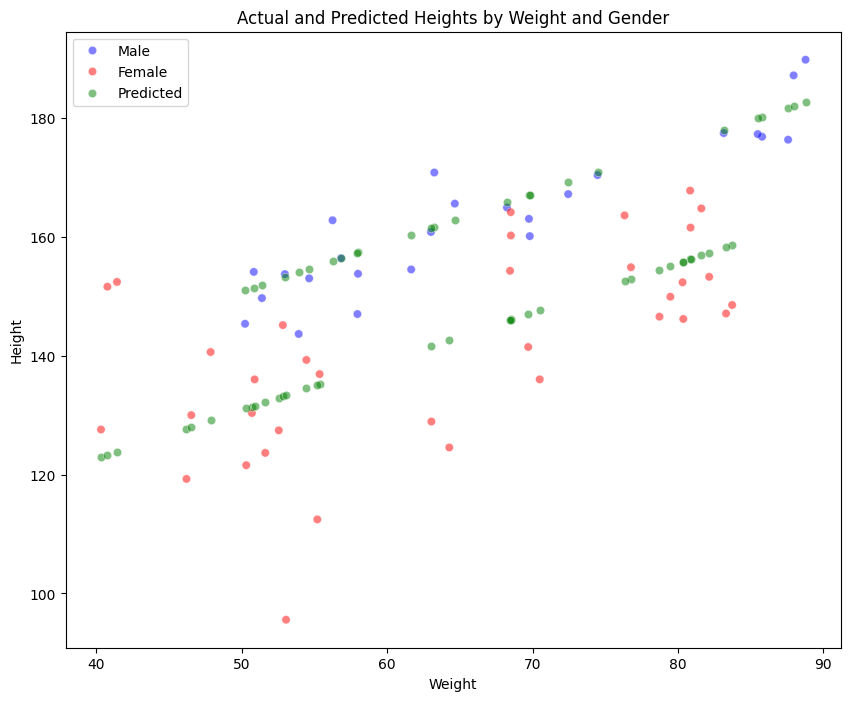

In [38]:
# 산점도 그리기
plt.figure(figsize=(10, 8))
sns.scatterplot(data=test_data, x='Weight', y='Height', hue='Gender', palette=['blue', 'red'], alpha=0.5)
sns.scatterplot(data=test_data, x='Weight', y='hybrid_test_pred', color='green', label='Predicted', alpha=0.5)

# 그래프 타이틀과 레이블 설정
plt.title('Actual and Predicted Heights by Weight and Gender')
plt.xlabel('Weight')
plt.ylabel('Height')

# 범례 설정
plt.legend()

plt.show()

## 5. Report

### RMSE Table

+ 4가지 알고리즘의 RMSE 값을 똑같은 test set에서 구해보세요.

In [40]:
result_df=pd.DataFrame({'Model':['Linear Regression','Regression Tree','Visual tree','Hybrid tree regression'],'RMSE':[10.68500,10.95076,10.56225, 10.68500]})
result_df


,Model,RMSE
0,Linear Regression,10.68500
1,Regression Tree,10.95076
2,Visual tree,10.56225
3,Hybrid tree regression,10.68500


## Tips

### 예측 성능
+ RMSE 순위를 매겨보세요. 어떤 알고리즘이 성능이 제일 좋고 나쁜가요?
+ 각 모델의 잔차 또는 예측vs실제값 plot을 그려보고 비교해보세요. 어떤 패턴이 있나요?
+ 성능이 더 좋다면 왜 성능이 좋을까요?
+ RMSE가 똑같은 알고리즘이 있다면 왜 그런 것일까요?

### 모델 해석
+ 회귀식이 구해진다면, 회귀계수를 보고 각 변수들의 키와의 관계를 해석해보세요. 그리고 회귀식을 시각화로 나타낼 수 있나요?
+ Regression tree를 해석해보세요
+ 성별을 나누어 해석해보세요
+ 모델들의 해석을 비교해보세요. 어떤 해석이 제일 그럴듯 한가요? 그와 관련된 자료가 있나요?
+ 어느 모델이 더 해석하기 쉽나요? 해석이 어려운 모델이 있나요?
+ 각 모델의 해석을 통해 insight를 얻고 이를 활용한다면 어떻게 활용할 수 있을까요?